# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [45]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata)

copy_df = merged_df.copy()

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [46]:
# Checking the number of mice.
merged_df['Mouse ID'].nunique()

249

In [47]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [48]:
# Optional: Get all the data for the duplicate mouse ID.
merged_df[merged_df['Mouse ID' ] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# must use .index property as the drop function expects an index label when removing rows from a dateframe
merged_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index)
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Checking the number of mice in the clean DataFrame.
# The only issue with this is we did actually drop mouse g989 not just the duplicated records
# However there is no way to determin which record is correct for a timepoint so I suppose it has to be removed?
merged_df['Mouse ID'].nunique()

248

## Summary Statistics

In [51]:
merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
std_err = merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summery_df = pd.DataFrame({'Mean Tumor Volume': mean, 'Median Tumor Volume': median, 'Tumor Volume Variance': variance, 'Tumor Volume Std. Dev.': std_dev, 'Tumor Volume Std. Err.': std_err})
summery_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
merged_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

/var/folders/bd/yg6v8kbn41xflcydqnlmhnbc0000gn/T/ipykernel_53042/2550341357.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


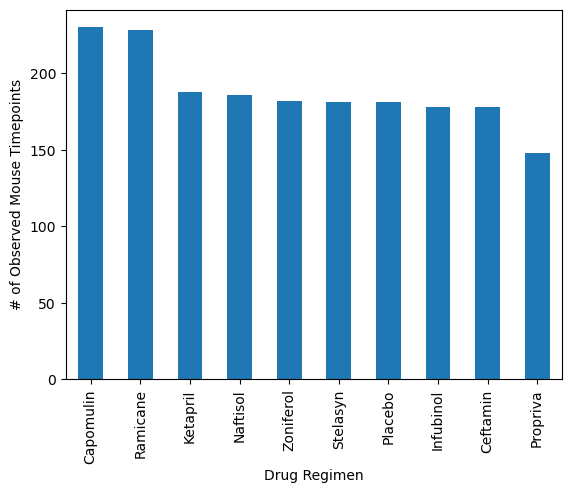

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot = merged_df['Drug Regimen'].value_counts().plot(kind='bar', width=0.5)

# Customize the plot
plot.set_ylabel('# of Observed Mouse Timepoints')
plot.set_xlabel('Drug Regimen')
plot.tick_params(axis='x', rotation=90)

# Display the plot
plot.figure.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

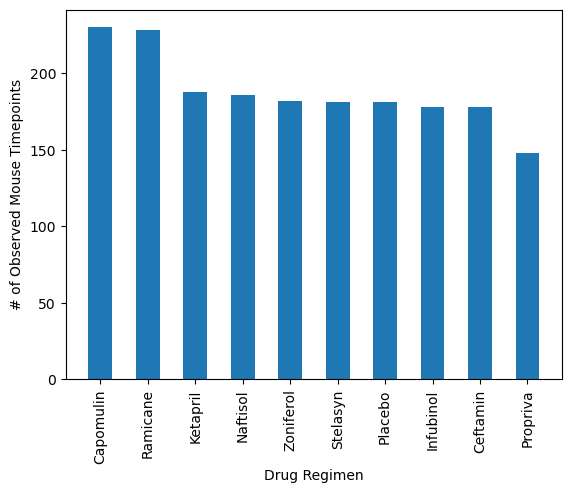

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(merged_df['Drug Regimen'].value_counts().index, merged_df['Drug Regimen'].value_counts(), width=0.5)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)

/var/folders/bd/yg6v8kbn41xflcydqnlmhnbc0000gn/T/ipykernel_53042/1330264047.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


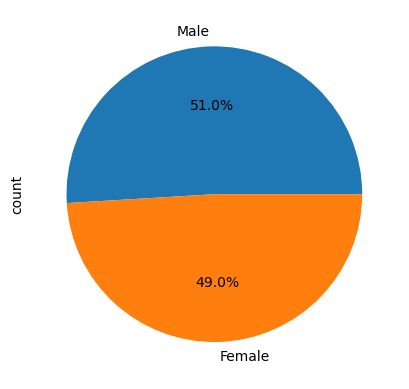

In [57]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
plot = merged_df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# Get the unique mice with their gender
# Make the pie chart
plot.figure.show()

Text(0, 0.5, 'count')

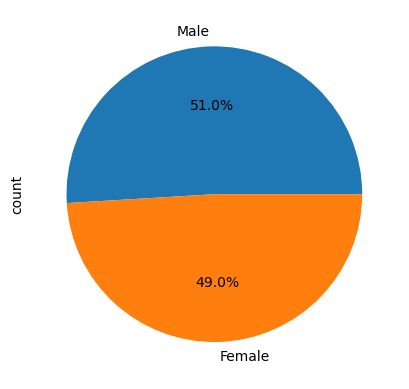

In [60]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
plt.pie(merged_df['Sex'].value_counts(), labels=merged_df['Sex'].value_counts().index, autopct='%1.1f%%')
plt.ylabel('count')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


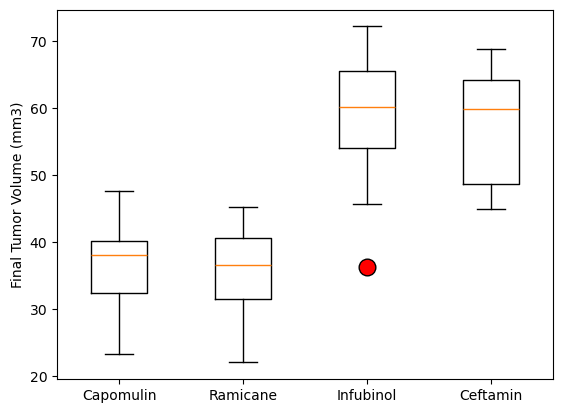

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

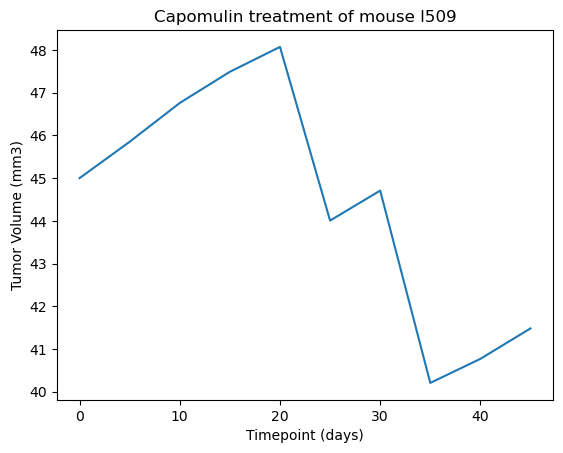

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


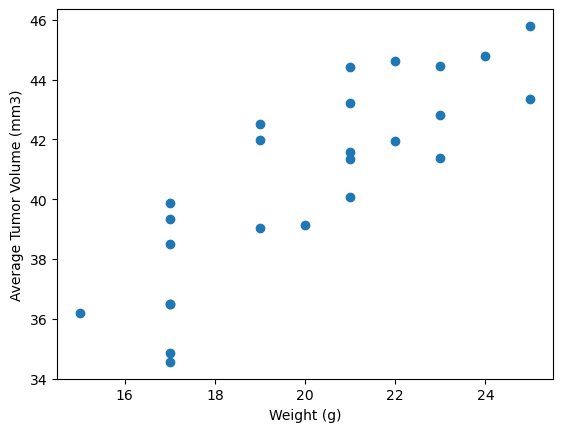

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


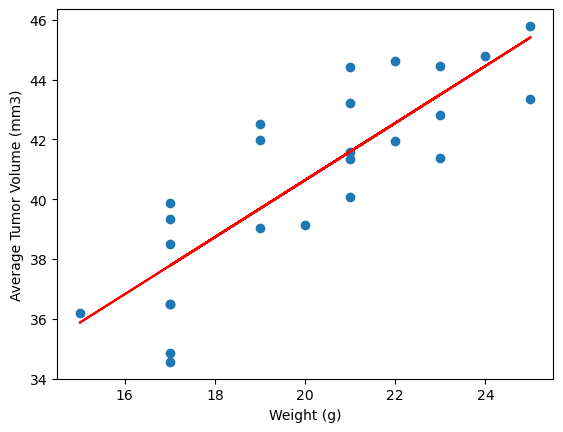

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
